# Рынок заведений общественного питания Москвы

Было принято решение открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами решили обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

По просьбе партнеров необходимо подготовить исследование рынка.   

В нашем распоряжении есть открытые данные о заведениях общественного питания в Москве (rest_data):

id — идентификатор объекта;  
object_name — название объекта общественного питания;  
chain — сетевой ресторан;  
object_type — тип объекта общественного питания;  
address — адрес;  
number — количество посадочных мест.  

Исходя из вышесказанного разделим данное исследование на несколько частей.

[Часть 1. Изучение общей информации](#1.)
* [1.1. Загрузка библиотек, импорт файлов с данными](#1.1.)
* [1.2. Получение общей информации о данных, поиск пропусков и дубликатов](#1.2.)

[Часть 2. Анализ данных](#2.)
* [2.1. Соотношение видов объектов общественного питания по количеству](#2.1.)
* [2.2. Соотношение сетевых и несетевых заведений по количеству](#2.2.)
* [2.3. Вид объекта общественного питания, для которого характерно сетевое распространение](#2.3.)
* [2.4. Характерные особенности сетевых заведений: их количество и число посадочных мест](#2.4.)
* [2.5. Среднее количество посадочных мест для каждого вида заведений](#2.5.)
* [2.6. Местонахождение объектов общественного питания](#2.6.)
* [2.7. Топ-10 улиц Москвы по количеству объектов общественного питания](#2.7.)
* [2.8. Число улиц Москвы с одним объектом общественного питания](#2.8.)
* [2.9. Закономерности распределения количества посадочных мест для топ-10 улиц Москвы](#2.9.)

[Часть 3. Презентация](#3.)

В завершении сделаем общий вывод и дадим рекомендации о виде заведения, количестве посадочных мест, а также районе расположения, а также прокомментируем возможность развития сети.

### Часть 1. Изучение общей информации

В данной части исследования загрузим данные о заведениях общественного питания Москвы. Убедимся, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости - обработаем исходные данные.

#### 1.1. Загрузка библиотек, импорт файлов с данными <a id='1.1.'></a> 

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import re
from io import BytesIO
import requests

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитаем данные методом read_csv и посмотрим на исхдный датафейм
rest_data = pd.read_csv('/datasets/rest_data.csv')
rest_data.sample(5)

,id,object_name,chain,object_type,address,number
10934,189466,Кафе «Березка»,нет,кафе,"город Москва, Касимовская улица, дом 31, корпус 1",26
1676,25619,Шоколадница,да,кафе,"город Москва, Зелёный проспект, дом 22",49
9291,166927,Larionov Grill and Bar,нет,кафе,"город Москва, Профсоюзная улица, дом 76",40
3256,27349,Столовая ГБОУ Школа № 1560 «Лидер»,нет,столовая,"город Москва, Новохорошёвский проезд, дом 12",250
6009,72656,KFC,да,предприятие быстрого обслуживания,"город Москва, Волгоградский проспект, дом 166,...",100


#### 1.2. Получение общей информации о данных, поиск пропусков и дубликатов <a id='1.2.'></a> 

Посмотрим общую информацию о датафрейме и всем признакам и их типам, воспользовавшись методом info.

In [3]:
# Посмотрим общую информацию о датафрейме методом info()
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Проверим наличие дупликатов в исходных данных, предварительно приведя все значения строковых параметров к нижнему регистру.

In [4]:
# Приведем значения строковых полей к нижнему регистру 
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['chain'] = rest_data['chain'].str.lower()
rest_data['object_type'] = rest_data['object_type'].str.lower()
rest_data['address'] = rest_data['address'].str.lower()

# Выведем на экран первые 5 строк датафрейма
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


In [5]:
# Избавимся от дупликатов в данных
rest_data = rest_data.drop_duplicates(['object_name', 'chain', 'object_type', 'address', 'number'])

# Выведем на экран результаты проверки дупликатов
print('Количество дубликатов в исходных данных:', rest_data.duplicated().sum())

Количество дубликатов в исходных данных: 0


Изучим более подробно все уникальные значения поля принадлежности объекта к сети общественного питания и уникальные значения типа объекта общественного питания.

In [6]:
# Найдем все уникальные значения принадлежности объекта к сети общественного питания методом unique()
rest_data['chain'].unique()

array(['нет', 'да'], dtype=object)

In [7]:
# Найдем все уникальные значения типа объекта общественного питания методом unique()
rest_data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Посмотрим основные статистические характеристики исходных данных по каждому числовому признаку.

In [8]:
# Рассмотрим обсновные характеристики количества посадочных мест методом describe()
rest_data['number'].describe()

count    15281.000000
mean        59.788234
std         74.843042
min          0.000000
25%         14.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

Рассмотрим более подробно заведения без посадочных мест и попробуем найти причины или понять закономерности их отсутствия.

In [9]:
# Рассмотрим детально заведения без посадочных мест, сделав срез методом query()
rest_number = rest_data.query('number == 0')
rest_number.sample(5)

# rest_number['object_type'].value_counts().reset_index()

,id,object_name,chain,object_type,address,number
240,154738,пекарня,нет,предприятие быстрого обслуживания,"город москва, улица гастелло, дом 37",0
15105,219032,бургер кинг,да,ресторан,"город москва, улица вавилова, дом 3",0
10943,183315,шаверма,нет,предприятие быстрого обслуживания,"город москва, улица москворечье, дом 14",0
15122,213380,крошка картошка,да,предприятие быстрого обслуживания,"город москва, варшавское шоссе, дом 87б",0
15177,211690,кофе с собой,да,предприятие быстрого обслуживания,"город москва, проспект андропова, дом 25а, стр...",0


Исходный датафрейм представлен 15366 строками и 6 столбцами - характеристиками предприятий общественного питания на территории Москвы. Каждая строка несет в себе информацию о конкретном объекте с указанием его идентификатора, названия, принадлежности к сетевой форме бизнеса, типа объекта, адреса местонахождения и количестве посадочных мест.  

В процессе анализа исходных данных не было выявлено ни пропусков, ни дубликатов. 

Все типы данных указаны верно. Однако, есть вероятность того, что в дальнейшем нам потребуется привести значения "нет" и "да" параметра "сетевой ресторан" к логическом типу. Но, на данном этапе пока оставим все без изменений.  

Для формирования более полного представления о данных, с которыми предстоит дальнейшая работа, были изучены все уникальные значения типа объектов общественного питания на предмет очень схожих по смыслу значений. Здесь можем с уверенностью сказать, что все типы уникальны и не дублируют друг друга. 

Также, более детально была изучена вместимость заведений, что позволило увидеть довольно большое количество объектов с количеством посадочных мест равным - 0. Однако, практически все эти результаты принадлежат предприятиям быстрого обслуживания, кафе, закусочным и магазинам (отделам кулинарии), которые зачастую реализуют свою продукция в целом не имея какого-либо помещения, либо находятся на фуд-кортах торговых центров и т.д. Иными словами, заведения без посадочных мест имеют одну отличительную черту - высокая пропускная способность, что в дальнейшем позволяет нам говорить об актуальности исходных данных и оставить нулевые значения без изменений.

### Часть 2. Анализ данных

Данную часть анализа посвятим исследованию текущего положения дел среди объектов общественного питания столичного рынка. Здесь более подробно рассмотрим виды заведений, количество посадочных мест, географию их распределения и т.д.   
По итогу получения результатов подведем итог и дадим рекомендации инвесторам о вхождении на рынок с собственным новым продуктом в сегменте общественного питания.

#### 2.1.  Соотношение видов объектов общественного питания по количеству  <a id='2.1.'></a> 

Начнем анализ исходных данных с определения количества объектов для каждого типа заведений и проанализируем полученные результаты, построив график.

In [10]:
# Проведем замену одного из значений столбца 'object_type'
rest_data.loc[rest_data['object_type'] == "предприятие быстрого обслуживания", 'object_type'] = "фаст-фуд"

# Найдем количество объектов для каждого типа заведения методом groupby()
object_quantity = rest_data.\
                    groupby('object_type').\
                    agg({'id':'count'}).\
                    reset_index().\
                    sort_values(by='id', ascending=False)

# Переименуем названия столбцов
object_quantity.columns = ['object_type', 'count']

# Выведем полученную сводную таблицу на экран
object_quantity

,object_type,count
3,кафе,6071
7,столовая,2584
6,ресторан,2282
8,фаст-фуд,1897
0,бар,855
1,буфет,576
4,кафетерий,395
2,закусочная,348
5,магазин (отдел кулинарии),273


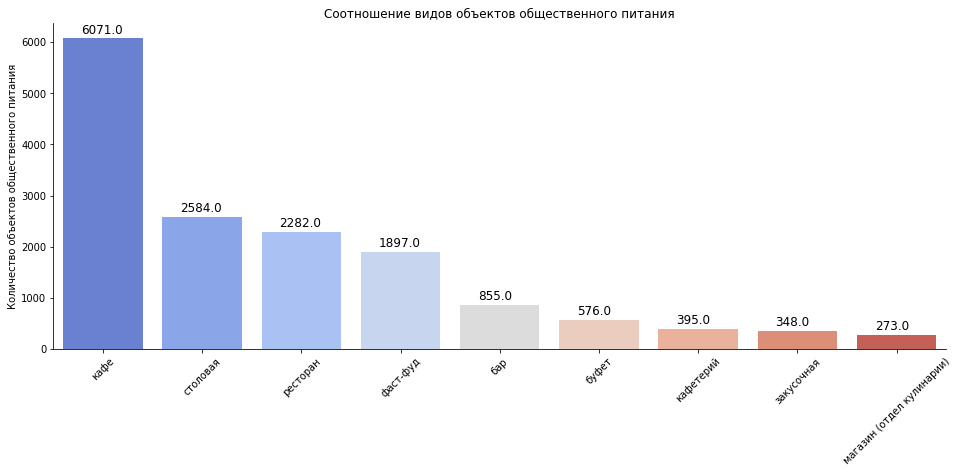

In [34]:
# Построим столбчатую диаграмму для большей наглядности
plt.figure(figsize=(16,6)) 
ax = sns.barplot(x='object_type', y='count', data=object_quantity, palette='coolwarm')
sns.despine()
for i in ax.patches:
    ax.text(i.get_x()+0.18, i.get_height()+100, \
            str(i.get_height()), fontsize=12,
                color='black')
ax.set_title('Cоотношение видов объектов общественного питания')
ax.set_xlabel('') 
ax.set_ylabel('Количество объектов общественного питания')
plt.xticks(rotation=45)
plt.show()

Первое место по количеству заведений на московском рынке общепита среди всех видов заняли - кафе. Их доля составила почти 40% от всего объема рынка – почти 6100 заведений. Их популярность легко объяснить – быстрое обслуживание и доступная ценовая политика.  
В тройку лидеров также вошли - столовые (доля рынка 16.9%) и рестораны (доля рынка 14.9%) с количеством заведений 2584 и, соответственно, 2282.  
Полученные результаты легко объяснить ритмом жизни москвичей и их культурой питания вне дома.

#### 2.2.  Соотношение сетевых и несетевых заведений по количеству  <a id='2.2.'></a> 

Найдем долю сетевых заведений от общего количества предприятий общественного питания на рынке Москвы. 

In [12]:
# Найдем количество объектов методом value_counts()
chain_companies = rest_data['chain'].value_counts(ascending=True)
chain_companies.reset_index()

,index,chain
0,да,2964
1,нет,12317


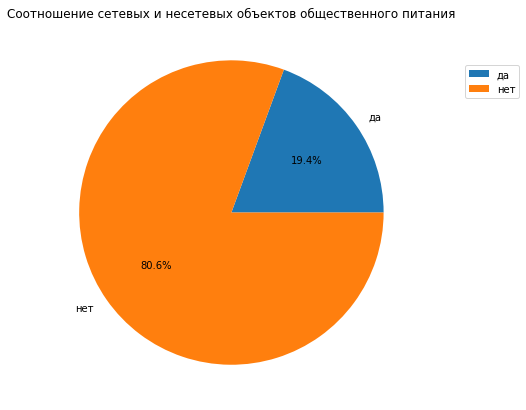

In [35]:
# Построим круговую диаграмму для большей наглядности
plt.figure(figsize=(7,7))
plt.pie(x = chain_companies, labels = chain_companies.index, autopct='%1.1f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.9))
plt.title('Cоотношение сетевых и несетевых объектов общественного питания') 
plt.ylabel('') 
plt.show()

На столичном рынке общепита лидирующую позицию занимают несетевые проекты, их доля составляет более 80% от рассматриваемых нами объектов. Такая популярность может быть обусловлена, например, тягой жителей к проектам с уникальной авторской концепцией и одновременно стартап-предложениями от гастроэнтузиастов.   
В целом же жители Москвы, перенасытившись с течением времени предложениями от сетевых брендов, все чаще откликаются на все новые интересные и ранее неизвестные предложения на рынке.

#### 2.3.  Вид объекта общественного питания, для которого характерно сетевое распространение  <a id='2.3.'></a> 

По результатам, полученным от соотношения сетевых и несетевых заведений, мы выяснили, что на долю первых приходится в 4 раза меньше заведений (доля рынка 19.3%) от всего объема столичного рынка. Исходя из этого, интересно узнать, для какого типа заведений характерно сетевое распространение. Для этого по кажогому виду объекта общественного питания найдем долю сетевых заведений.

In [14]:
# Сделаем срез данных методом query()
chain_member = rest_data.query('chain == "да"')

# Найдем количество объектов методом value_counts()
# chain_member['object_type'].value_counts().reset_index()
chain_grouped = chain_member.\
                groupby('object_type').\
                agg({'id':'count'}).\
                reset_index().\
                sort_values(by='id', ascending=False)

# Переименуем названия столбцов
chain_grouped.columns = ['object_type', 'count']

# Выведем полученную сводную таблицу на экран
chain_grouped

,object_type,count
3,кафе,1396
8,фаст-фуд,788
6,ресторан,543
5,магазин (отдел кулинарии),78
2,закусочная,56
4,кафетерий,52
0,бар,37
1,буфет,11
7,столовая,3


In [15]:
# Расчитаем процент сетевых брендов общественного питания среди всех объектов по каждому из видов заведений
chain_grouped['percent'] = round(chain_grouped['count'] / object_quantity['count'] * 100, 1)
chain_grouped = chain_grouped.sort_values(by='percent', ascending=False)
chain_grouped

,object_type,count,percent
8,фаст-фуд,788,41.5
5,магазин (отдел кулинарии),78,28.6
6,ресторан,543,23.8
3,кафе,1396,23.0
2,закусочная,56,16.1
4,кафетерий,52,13.2
0,бар,37,4.3
1,буфет,11,1.9
7,столовая,3,0.1


Фаст-фуд – самый популярный формат объектов общественного питания. Более 40% заведений принадлежат сетям быстрого питания.  

На втором и третьем месте данного рейтинга находятся:
* магазины (отделы кулинарии) - их доля составляет почти 30%;
* рестораны - количество заведений превышает 500 и их доля равна почти 24%.

#### 2.4. Характерные особенности сетевых заведений: их количество и число посадочных мест <a id='2.4.'></a> 

Узнаем что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест. Для этого сгруппируем заведения по их названиям и найдем среднее значение количества посадочных мест по каждому из них.

In [16]:
# Сгруппируем заведения по названию и количеству посадочных мест методом groupby()
chain_characteristic = chain_member.groupby('object_name').agg({'object_name':'count', 'number':'median'})

# Переименуем названия столбцов в таблице
chain_characteristic.columns = ['object_count', 'seats_count']

# Выведем 5 случайных строк таблицы 
chain_characteristic.reset_index().sample(5)

,object_name,object_count,seats_count
207,кафе «бургер кинг»,3,50.0
227,кафе «пицца хат»,3,24.0
270,кафе шоколад,1,90.0
455,ресторан «хинкальная»,1,60.0
391,пиццерия «домино'с пицца»,5,15.0


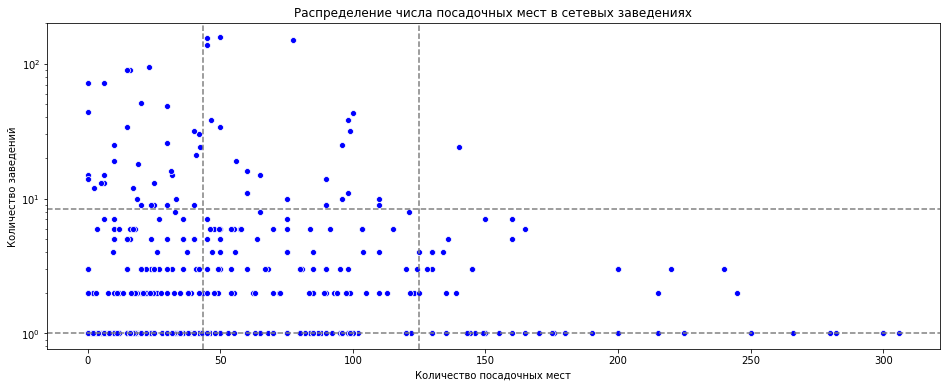

In [17]:
# Построим диаграмму рассеяния для большей наглядности
plt.figure(figsize=(16, 6))  
ax = sns.scatterplot(x='seats_count', y='object_count', data=chain_characteristic, color='blue')
ax.set_title('Распределение числа посадочных мест в сетевых заведениях')
ax.set_xlabel('Количество посадочных мест')
ax.set_ylabel('Количество заведений') 
ax.set(yscale="log")
plt.axhline(np.percentile(chain_characteristic['object_count'], 50), linestyle='--', color='grey')
plt.axhline(np.percentile(chain_characteristic['object_count'], 90), linestyle='--', color='grey')
plt.axvline(np.percentile(chain_characteristic['seats_count'], 50), linestyle='--', color='grey')
plt.axvline(np.percentile(chain_characteristic['seats_count'], 90), linestyle='--', color='grey')
plt.show()

Одной из особенностей сетевых заведений на рынке Москвы является явное сокращение количества предприятий общественного питания при возрастании числа посадочных мест.
Также мы выяснили, что в среднем 2-3 заведения, принадлежащие одной сети, имеют не более 50 посадочных мест. Если смотреть на это более масштабно, то в 90% случаев число заведений - не превышает 8 и число посадочных мест - 130.  

Подводя итог вышесказанному, отметим, что для столичного рынка характерно - небольшое количество заведений одной сети с небольшой вместимостью.

#### 2.5. Среднее количество посадочных мест для каждого вида заведений  <a id='2.5.'></a> 

Для каждого вида объекта общественного питания найдем среднее количество посадочных мест. Начнем с построения диаграммы размаха и более детального ее изучения.

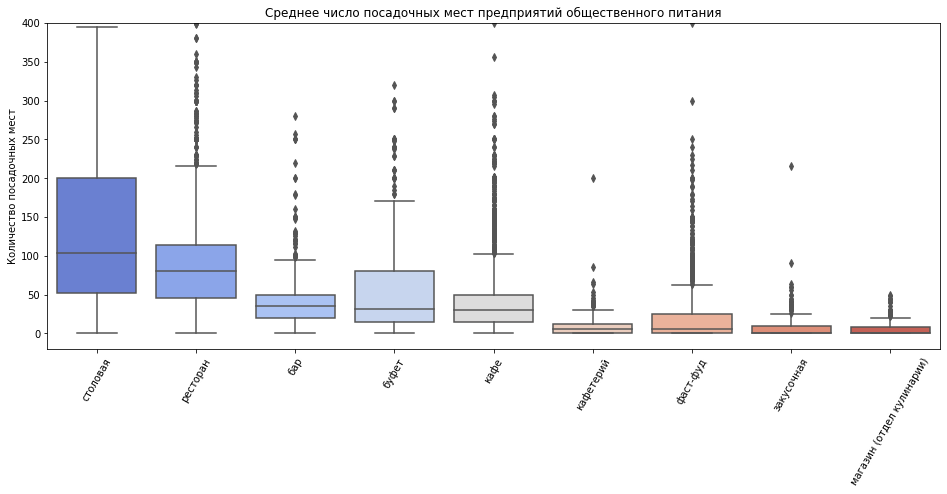

In [37]:
# Зададим переменную для сотрировки количества мест для каждого вида заведения
grouped = rest_data.loc[:,['object_type', 'number']]\
    .groupby(['object_type'])\
    .median()\
    .sort_values(by='number', ascending=False)

# Построим диаграмму размаха для большей наглядности
plt.figure(figsize=(16,6))
ax = sns.boxplot(x='object_type', y='number', data=rest_data, palette='coolwarm', order=grouped.index)
ax.set_title('Среднее число посадочных мест предприятий общественного питания')
ax.set_xlabel('')
ax.set_ylabel('Количество посадочных мест')
ax.set_ylim(-20, 400)
plt.xticks(rotation=60)
plt.show()

In [19]:
# Сгруппируем данные по типу заведения и количеству посадочных мест методом groupby()
object_seats = rest_data.groupby('object_type').agg({'number':'median'}).\
                        sort_values(by='number', ascending=False).\
                        reset_index()

# Переименуем названия столбцов в таблице
object_seats.columns = ['object_type', 'seats_count']

# Выведем полученные данные на экран
object_seats

,object_type,seats_count
0,столовая,103
1,ресторан,80
2,бар,35
3,буфет,32
4,кафе,30
5,кафетерий,6
6,фаст-фуд,6
7,закусочная,0
8,магазин (отдел кулинарии),0


Лидером среди типов заведений по среднему количеству посадочных мест является - столовая. Здесь показатель вместимости - чуть больше 100 мест и это можно объяснить ее форматом, для которого характерен большой поток людей на единицу времени.
У ресторанов наблюдается идентичная со столовыми ситуация и в таблицу лидеров они попали на второе место. Для них характерно чуть меньшее число посадочных мест - в среднем этот показатель равен 80.
Показатели наименьшей вместимости или в целом отсутствие посадочных мест можем наблюдать у таких типов заведений, как: фаст-фуд, закусочные и отделы кулинарии в магазинах и это легко объясняется тем, что их специфика работы - еда с собой, т.е. "на вынос".

#### 2.6. Местонахождение объектов общественного питания   <a id='2.6.'></a> 

Из полного адреса месторасположения заведения выделим только улицы и полученные результаты запишем в отдельный столбец.

In [20]:
# Выделим назваие улицы из строки с адресом при помощи регулярного выражения
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд', 'Проезд', 'село',
         'аллея','бульвар','набережная','тупик','линия', 'территория', 'километр', 'квартал']
str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))
rest_data['street'] = rest_data['address'].str.extract(str_pat, flags=re.I)

# Проверим результат, выведя на экран 5 случайных строк
rest_data.sample(5)

,id,object_name,chain,object_type,address,number,street
10864,181779,булочная-пекарня,нет,кафе,"город москва, изумрудная улица, дом 3, строение 2",10,изумрудная улица
6042,29615,столовая гбоу школа № 109,нет,столовая,"город москва, ленинский проспект, дом 131, кор...",300,ленинский проспект
7202,24026,кафе «незабудка»,нет,кафе,"город москва, город зеленоград, корпус 1106е",40,NaN
291,124578,джаганнат,да,кафе,"город москва, 1-я тверская-ямская улица, дом 1...",30,1-я тверская-ямская улица
11338,189880,хинкали от души,нет,фаст-фуд,"город москва, бульвар дмитрия донского, дом 1",15,бульвар дмитрия донского


После проведенных преобразований проверим остались ли у нас адреса, из которых не удалось выделить название улицы. При обнаружении отсутствующих значений, рассмотрим их более детально и примем решение по таким данным.

In [21]:
# Проверим количество отсутствующих значений методом isnull()
print('Количество отсутствующих значений в столбце c названиями улиц:', rest_data['street'].isnull().sum())

Количество отсутствующих значений в столбце c названиями улиц: 369


In [22]:
# Посмотрим на строки с отсутствующими значениями
rest_data[rest_data['street'].isnull()].sample(5)

,id,object_name,chain,object_type,address,number,street
9101,162722,кафетерий,нет,кафетерий,"город москва, город зеленоград, корпус 435а",3,NaN
7223,83687,шоколадница,да,кафе,"город москва, город зеленоград, корпус 1446",70,NaN
1491,25349,ресторан «гранатовый сад»,нет,ресторан,"поречная улица, дом 5/14, строение 1",40,NaN
8737,139075,макдоналдс,да,фаст-фуд,"город москва, город зеленоград, корпус 2309а",76,NaN
11753,189124,шашлычный мир,нет,магазин (отдел кулинарии),"город москва, город московский, 1-й микрорайон...",0,NaN


Посмотрев на данные "под другим углом", мы можем обосновать отсутствующие значения улиц следующим образом - в большинстве адресов указаны города, в которых совсем отсутствуют улицы, а деление города происходит по микрорайонам (например, город Зеленоград и частично города Троицк и Московский). Также, встречаются довольно небольшие населеные пункты (например, поселки и деревни), в которых, вероятнее всего, также не было необходимости в улицах.  
Разобравшись с природов отсутствующих улиц мы можем сделать вывод, что из первоначальных данных нам удалось выделить все возможные значения.

#### 2.7. Топ-10 улиц Москвы по количеству объектов общественного питания   <a id='2.7.'></a> 

Узнаем на каких улицах Москвы находится наибольшее количество заведений, для этого сгруппируем данные и посмотрим на топ-10 результатов. 

In [23]:
# Сгруппируем данные по названию улицы и количеству заведений методом groupby()
top_streets = rest_data.groupby('street').agg({'id': 'count'}).\
                        sort_values(by='id', ascending=False).\
                        reset_index().\
                        head(10)

# Переименуем названия столбцов в таблице
top_streets.columns = ['street', 'object_count']

# Выведем полученные данные на экран
top_streets

,street,object_count
0,проспект мира,203
1,профсоюзная улица,181
2,ленинградский проспект,170
3,пресненская набережная,167
4,варшавское шоссе,161
5,ленинский проспект,147
6,проспект вернадского,128
7,кутузовский проспект,114
8,каширское шоссе,111
9,кировоградская улица,108


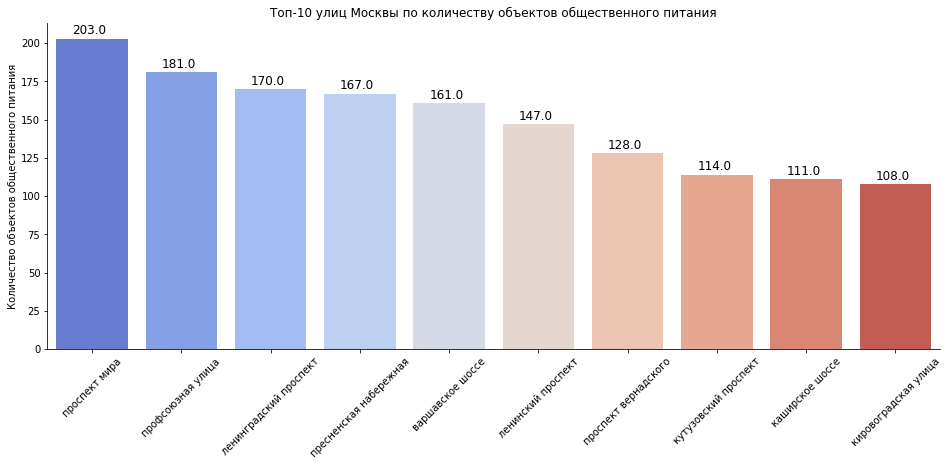

In [39]:
# Построим столбчатую диаграмму для большей наглядности
plt.figure(figsize=(16,6)) 
ax = sns.barplot(x='street', y='object_count', data=top_streets, palette='coolwarm')
sns.despine()
for i in ax.patches:
    ax.text(i.get_x()+0.18, i.get_height()+3, \
            str(i.get_height()), fontsize=12,
                color='black')
ax.set_title('Топ-10 улиц Москвы по количеству объектов общественного питания')
ax.set_xlabel('')
ax.set_ylabel('Количество объектов общественного питания') 
plt.xticks(rotation=45)
plt.show()

Мы видим, что на первом месте по количеству заведений находится улица - проспект Мира, на ней сосредоточено более 200 объектов общественного питания.  В целом же, все остальные улицы рейтинга топ-10 показали довольно высокие результаты и их показатели не опускаются ниже 100 заведений. 

Теперь постараемся ответить на вопрос - в каких районах Москвы находятся данные улицы. Для этого воспользуемся внешней информацией - найдем и скачаем готовую таблицу с данными о том, в каком районе проходит какая улица. 

In [25]:
# Прочитаем данные методом read_csv 
spreadsheet_id = '1X_zAyVly8WjljYhKyKldzYINVTRRCeMy2UkhwOND5bs'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)

# Посмотрим на исходный датафрейм
district_data = pd.read_csv(BytesIO(r.content))
district_data.sample(5)

,streetname,areaid,okrug,area
259,улица Солянка,18,ЦАО,Таганский район
1985,Беговая улица,69,САО,Хорошевский район
441,Столешников переулок,19,ЦАО,Тверской район
2145,улица Кипренского,66,САО,Район Сокол
4073,1-я Горловская улица,133,ЮЗАО,Район Южное Бутово


Для сопоставления улиц с районами нам потребуется объединить по общему столбцу ранее полученные данные по топ-10 улиц с наибольшим количеством заведений общественного питания с данными о районах.

In [26]:
# Переименуем столбец 'streetname' таблицы district_data
district_data = district_data.rename(columns={'streetname' : 'street'})

# Приведем значения строковых полей к нижнему регистру 
district_data['street'] = district_data['street'].str.lower()
district_data['area'] = district_data['area'].str.lower()

# Объединим таблицы методом merge()
top_street_district = top_streets.merge(district_data, on='street', how='inner')

# Выведем полученные результаты
top_street_district

,street,object_count,areaid,okrug,area
0,проспект мира,203,70,СВАО,алексеевский район
1,проспект мира,203,86,СВАО,ярославский район
2,проспект мира,203,78,СВАО,район марьина роща
3,проспект мира,203,79,СВАО,останкинский район
4,проспект мира,203,81,СВАО,район ростокино
5,проспект мира,203,82,СВАО,район свиблово
6,проспект мира,203,16,ЦАО,мещанский район
7,профсоюзная улица,181,123,ЮЗАО,академический район
8,профсоюзная улица,181,132,ЮЗАО,район черемушки
9,профсоюзная улица,181,134,ЮЗАО,район ясенево


Изучив более подробно географию расположения топ-10 улиц мы выяснили, что они проходят через 48 районов Москвы и чаще всего затрагивают Южный и Юго-Западный округа, далее следуют - Западный и Центральный АО.

#### 2.8.  Число улиц Москвы с одним объектом общественного питания  <a id='2.8.'></a> 

Найдем число улиц Москвы с одним объектом общественного питания и узнаем через сколько районов проходят эти улицы. А также, попробуем найти особенности их распределения по округам города.

In [27]:
# Сгруппируем данные по названию улицы и количеством заведений равным 1 методом groupby()
one_object = rest_data.groupby('street').agg({'id': 'count'}).\
                        sort_values(by='id', ascending=True).\
                        reset_index().query('id == 1')

# Переименуем названия столбцов в таблице
one_object.columns = ['street', 'object_count']

# Проверим полученный результат
one_object.sample(5)

,street,object_count
106,улица максимова,1
284,стромынский переулок,1
466,хлыновский тупик,1
194,рижский проезд,1
352,2-й новокузнецкий переулок,1


In [28]:
# Найдем число улиц с одним объектом 
print('Число улиц Москвы с одним объектом общественного питания:', len(one_object))

Число улиц Москвы с одним объектом общественного питания: 573


In [29]:
# Объединим таблицы методом merge()
one_object_district = one_object.merge(district_data, on='street', how='inner')

# Сгруппируем данные по районам и количество объектов в каждом из них методом groupby()
one_object_district = one_object_district.groupby(['okrug', 'area']).\
                    agg({'object_count': 'count'}).\
                    sort_values(by='object_count', ascending=False).\
                    reset_index()

# Переименуем названия столбцов в таблице
one_object_district = one_object_district.rename(columns={'object_count':'street_count'}) 

# Выведем на экран полученный результат
one_object_district.sample(5)

,okrug,area,street_count
16,ЗАО,район внуково,9
86,ВАО,район ивановское,1
20,ЗАО,можайский район,8
79,ЮЗАО,район северное бутово,2
98,ЗАО,район филевский парк,1


In [30]:
# Найдем количество районов через которые проходят улицы с одним объектом
print('Количество районов Москвы через которые проходят улицы с одним объектом:', len(one_object_district))

Количество районов Москвы через которые проходят улицы с одним объектом: 100


Ниже выведем все названия районов Москвы, через которые проходят улицы с одним заведением и далее посмотрим как эти районы распределены по округам.

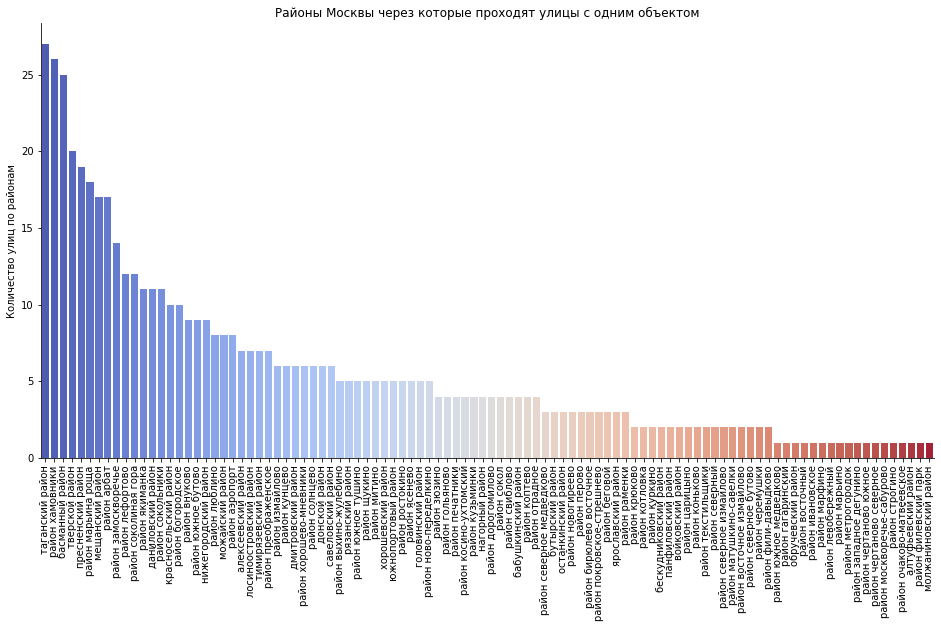

In [40]:
# Построим столбчатую диаграмму для большей наглядности
plt.figure(figsize=(16,8)) 
ax=sns.barplot(x='area', y='street_count', data=one_object_district, palette='coolwarm')
sns.despine()
ax.set_title('Районы Москвы через которые проходят улицы с одним объектом')
ax.set_xlabel('')
ax.set_ylabel('Количество улиц по районам') 
plt.xticks(rotation=90)
plt.show()

In [32]:
# Сгруппируем данные по районам и округам, в которых они находятся методом groupby()
okrug_distrist_count = one_object_district.\
                        groupby('okrug').agg({'street_count': 'count'}).\
                        sort_values(by='street_count', ascending=False).\
                        reset_index()

# Переименуем названия столбцов
okrug_distrist_count.columns = ['okrug', 'district_count']

# Выведем результаты на экран
okrug_distrist_count.transpose()

,0,1,2,3,4,5,6,7,8,9
okrug,СВАО,ВАО,САО,ЗАО,ЦАО,ЮВАО,ЮЗАО,ЮАО,СЗАО,Зеленоград
district_count,15,14,14,10,10,10,9,8,7,3


Общее число улиц Москвы, на которых расположен всего 1 объект общественного питания - 573, при этом они проходят через 100 районов столичного региона. Если посмотреть на принадлежность данных районов к округам, то наибольшее их количество находится в Северо-Восточном, Восточном и Северном округах.  
Основываясь на данных результатах, можем проследить тенденцию, что улицы с наибольшим и наименьшим количеством заведений расположены, как правило, в противоположенных частях города.

#### 2.9.  Закономерности распределения количества посадочных мест для топ-10 улиц  Москвы<a id='2.9.'></a> 

Построим диаграмму размаха, чтобы проверить, если ли какая-либо взаимосвязь между данными: числом посадочных мест и улицами Москвы, на которых находится наибольшее количество заведений.

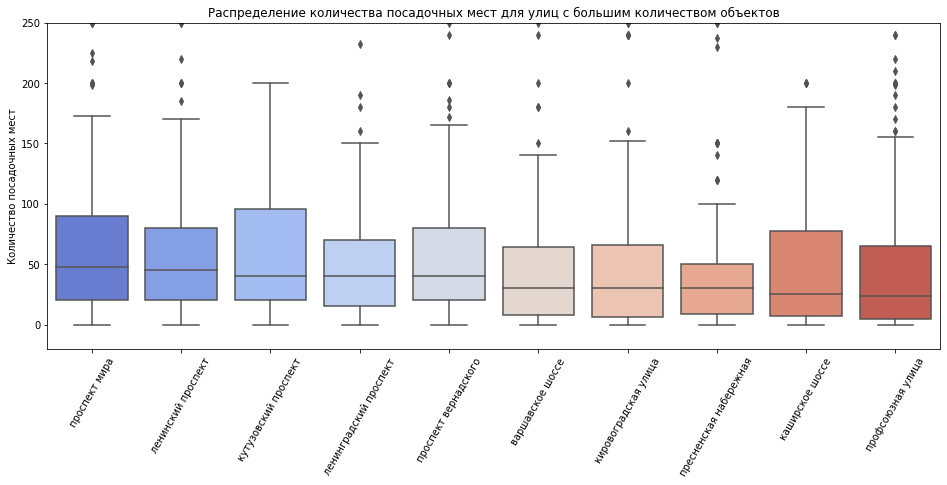

In [33]:
# Зададим переменную для топ-10 улиц и сделаем срез
top_streets_list = top_streets['street'].to_list()
top_street_seats = rest_data.query('street in @top_streets_list')

# Зададим переменную для сотрировки количества посадочных мест топ-10 улиц
grouped1 = top_street_seats.groupby(['street'])\
    .median()\
    .sort_values(by='number', ascending=False)

# Построим диаграмму размаха для большей наглядности
plt.figure(figsize=(16,6))
ax = sns.boxplot(x='street', y='number', data=top_street_seats, palette='coolwarm', order=grouped1.index)
ax.set_title('Распределение количества посадочных мест для улиц с большим количеством объектов')
ax.set_xlabel('')
ax.set_ylabel('Количество посадочных мест')
ax.set_ylim(-20, 250)
plt.xticks(rotation=60)
plt.show()

Выбор собственниками для своих заведений локаций наложил определенный отпечаток на число посадочных мест. В целом по Москве наблюдаем ситуацию, что чем престижнее район и чем больше заведений сосредоточено на его улицах, тем меньше их вместимость. Помимо этого, скорее всего свою роль здесь играет еще стоимость квадратного метра.  
Из графика мы можем отчетливо увидеть, что число посадочных мест в заведениях топ-10 улиц в среднем не превышает 50, а чаще всего этот показатель варьируется от 30 - до 40 мест.

### Шаг 3. Презентация

Презентация: <https://yadi.sk/i/VZjhVYHHyq9wmA> 

### Общий вывод

Финализируя результаты проведенного исследования отметим, что первое место по количеству заведений на московском рынке общепита среди всех типов объектов заняли - кафе. Их доля близка к половине всего объема рынка Москвы.    
Если более детально рассмотреть вместимость объектов общественного питания на рынке, то лидирующие позиции среди типов заведений занимают столовые - в среднем этот показатель немного превышает 100 мест.   
В виду того, что рынок общепита продолжает активно развиваться и прирастать новыми уникальными заведениями с авторскими концепциями, большую популярность получили несетевые объекты, на них приходится более 80% доли рынка. В четыре раза меньше заведений сосредоточено в руках сетевых компаний и, как правило, на столичном рынке прослеживается тенденция присутствия в среднем 2-3 заведений одной сети с небольшим количество посадочных мест.   
Фаст-фуд – самый популярный формат объектов общественного питания. Более 40% заведений принадлежат сетям быстрого питания.   
По географии расположения объектов можем выделить следующую закономерность: улицы с наибольшим количеством заведений находятся в Южном, Юго-Западном, Западном и Центральном АО; улицы с 1 заведением имеют больший территориальный охват районов Москвы и в основном находятся в строго противоположной части города - Северо-Восточном, Восточном и Северном АО.  
В целом по Москве можем наблюдаем ситуацию, что чем престижнее район и чем больше заведений сосредоточено на его улицах, тем меньше их вместимость. В среднем данный показатель равен 30-40 объектам и не превышает 50.

### Рекомендации

Довольно сложно в данной ситуации дать конкретные рекомендации и советы к действию, так как исследование было довольно общим, но вполне можно указать вектор развития и нюансы, на которые стоит обратить свое внимание при принятии решений.  
Начнем с того, что решение открыть именно небольшое кафе - весьма правильное, т.к. наибольшей популярностью среди потребителей пользуется именно этот тип заведения, а средней показатель количества посадочных мест для кафе - около 30, что вполне можно отнести к характеристике - небольшое.  
Из описания данного проекта становится понятно, что он не будет принадлежать одному из сетевых брендов и здесь я снова соглашусь, что этот подход будет вполне оправданным, т.к. несетевые предприятия общественного питания - самый динамично развивающийся сегмент московского рынка. Такая динамика возникла благодаря тому, что потребитель пресытился популярным предложением сетевых компаний и один из главных для них запросов – это новые впечатления. Идея заведения с обслуживанием роботами - отличное нестандартное решение, которое безусловно найдет отклик у московских потребителей.  
Относительно географии расположения кафе, хотелось бы посоветовать обратить внимание на улицы с наибольшим количеством заведений, т.к. такое плотное сосредоточение объектов скорее всего обусловлено высоким на них спросом. Однако, здесь стоит особое внимание уделить вопросу высокой стоимости аренды площадей, что повысит общую стоимость проекта и увеличит срок окупаемости. Отдельно при выборе локации особое внимание следует обратить на предложения других близлежащих заведений на наличие схожей концепции и предложений.  
В целом идея кафе с роботами весьма инновационна и имеет большие перспективы в будущем.